In [60]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
df_train = pd.read_csv("nndata/train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_train.isna().sum().sum()

0

El set no tiene datos faltantes.

In [63]:
df_train.mask(df_train.gt(255) & df_train.lt(0))
df_train.isna().sum().sum()

0

También se encontró que ningún pixel se sale del rango esperado

In [64]:
labels = df_train.pop('label')
features = np.array(df_train)
features_train, features_test, labels_train, labels_test = train_test_split(features, 
labels, test_size=0.33, random_state=42)

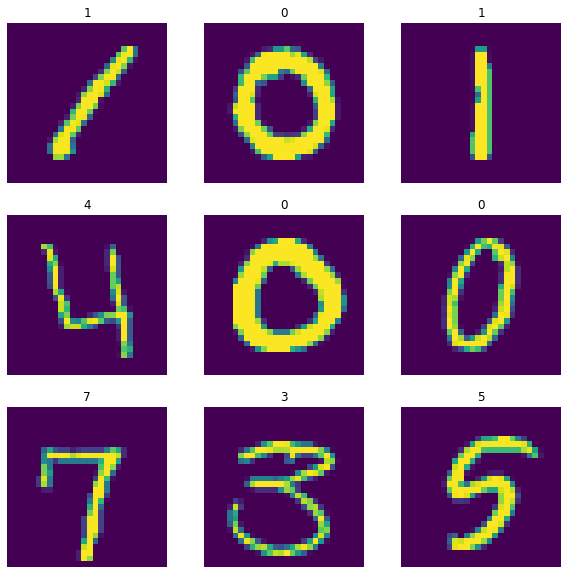

In [65]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = np.copy(features[i]).reshape((28,28))
    plt.imshow(img.astype('uint8'))
    plt.title(labels[i])
    plt.axis("off")

In [66]:
print(f'Min: {labels.min()}')
print(f'Max: {labels.max()}')

Min: 0
Max: 9


Al inspeccionar las gráficas y los máximos y mínimos de las labels se puede concluir que, de estar bien clasificados los números, estos van del 0 al 9.

In [154]:
keras.utils.set_random_seed(1234)
NN_simple = keras.Sequential()
NN_simple.bias = 0.5
NN_simple.add(keras.layers.Input(784))
NN_simple.add(keras.layers.Rescaling(1.0/255))

NN_simple.add(keras.layers.Dense(784, activation='relu'))
#NN_simple.add(keras.layers.Dense(392, activation='relu'))
NN_simple.add(keras.layers.Dense(196, activation='relu'))
#NN_simple.add(keras.layers.Dense(98,  activation='relu'))
NN_simple.add(keras.layers.Dense(49,  activation='relu'))

#NN_simple.add(keras.layers.Dropout(.2))


NN_simple.add(keras.layers.Dense(10, activation='softmax'))
NN_simple.output_shape



(None, 10)

In [171]:
#cambiar el formato de las labels para que la NN pueda mostrar las probabilidades de que el número sea tal en vez del valor del número
labels10 = np.zeros(shape=(labels_train.shape[0], 10), dtype=np.float32)
for i, val in enumerate(labels_train):
    labels10[i][val] = 1.0

9
0


In [69]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

In [155]:
NN_simple.compile( metrics=["accuracy"], 
optimizer = keras.optimizers.Adam(learning_rate=1e-3), 
loss="categorical_crossentropy")

In [156]:
NN_simple.fit(features_train, labels10, epochs=25, callbacks = callbacks)

Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Program Files\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Program Files\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Program Files\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jmdel\AppData\Local\Temp\ipykernel_2364\3217034709.py", line 1, in <module>
      NN_simple.fit(features_train, labels10, epochs=25, callbacks = callbacks)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\jmdel\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1442116]

In [23]:
del NN_simple
NN_simple = keras.models.load_model('save_at_11.h5')

Dado que el mejor performace fue en la época 11, se tomó ese resultado para la red neuronal simple.

In [31]:
prediction = NN_simple.predict(features_test)

875/875 [==============================] - 3s 4ms/step


In [33]:
prediction.shape

(28000, 10)

In [49]:
results = np.zeros(shape=prediction.shape[0], dtype='uint8')

for i in range(prediction.shape[0]):
    results[i] = int(np.argmax(prediction[i]))

[3 0 5 ... 0 5 3]


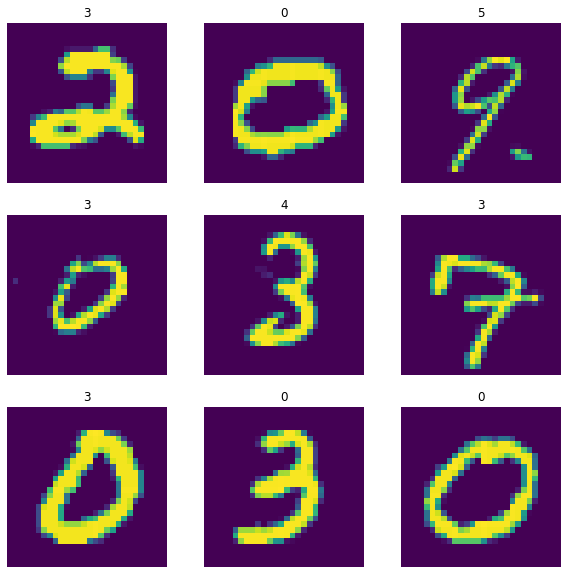

In [50]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = np.copy(features_test[i]).reshape((28,28))
    plt.imshow(img.astype('uint8'))
    plt.title(results[i])
    plt.axis("off")